# Regression

✍ **Arjun Adhikari**, May 31, 2019  
Edit : June 2, 2019  

Regression is the estimation of unknown values of one variable from known values of another variable.

## Regression Lines

1. **Y on X line** : This line is used to find Y when X is given.  
2. **X on Y line** : This line is used to find X when Y is given.

1. The regression line **Y on X** is defined as:  
$Y - \bar{Y} = b_{yx} (X - \bar{X})$
2. The regression line **X on Y** is defined as :   
$X - \bar{X} = b_{xy} (Y - \bar{Y})$  
where, 
   $b_{yx}$ is defined as regression coefficient of y on x.  
    $b_{xy}$ is defined as regression coefficient of x on y.   
    
    $\bar{X} = \frac{\sum{x}}{n}$  
    
    $\bar{Y} = \frac{\sum{y}}{n}$ 
    
    $b_{yx} = \rho\frac{\sigma{y}}{\sigma{x}} = \frac{\sum{xy} - \frac{\sum{x}\sum{y}}{n}}{\sum{x^2} - \frac{(\sum{x})^2}{n}}$ and  

    $b_{xy} = \rho\frac{\sigma{x}}{\sigma{y}} = \frac{\sum{xy} - \frac{\sum{x}\sum{y}}{n}}{\sum{y^2} - \frac{(\sum{y})^2}{n}}$
    where,   

    $(\sigma_{y})^2 = \frac{\sum{(Y - \bar{Y})^2}}{n}$  

    $(\sigma_{x})^2 = \frac{\sum{(X - \bar{X})^2}}{n}$ 
    and,  

    $\rho$ = coefficient of correlation


In [1]:
import numpy as np

In [2]:
X = np.arange(9)
Y = np.random.randint(low=10, high=50, size=9)
print(X,Y, sep='\n')

[0 1 2 3 4 5 6 7 8]
[27 34 32 36 28 27 27 47 26]


In [3]:
byx = (np.sum(X*Y) - (np.sum(X)*np.sum(Y))/X.size)/(np.sum(X**2) - (np.sum(X)**2)/X.size)
print(byx)

0.26666666666666666


In [4]:
bxy = (np.sum(X*Y) - (np.sum(X)*np.sum(Y))/X.size)/(np.sum(Y**2) - (np.sum(Y)**2)/X.size)
print(bxy)

0.04321728691476586


## Properties of Regression Lines

1. The regression lines always intersect at a point ($\bar{X}, \bar{Y}$).
2. If two regression lines are given and $\theta$ be the acute angle between them, then :  

$\tan\theta = \left|\frac{1-\rho^2}{\rho}\right| \left|\frac{\sigma_{x}.\sigma_{y}}{\sigma_{x}^2.\sigma_{y}^2}\right|$  

where,
$\rho$ = coefficient of correlation

**Remark** :  
When $\rho = 1, \tan\theta = 0, \theta = 0$  
It's a perfect correlation, there is no difference between regression line.

When $\rho = 0, \tan\theta = \infty, \theta = \frac{\pi}{2}$   
There's no correlation.

3. The coefficient of correlation is geometric mean of regression coefficient.  
$\rho = G.M(byx, bxy)$   
$\rho = \sqrt{byx.bxy}$ 

4. If a regression coefficient is less than 1, then another regression coefficient should be greater than 1.

$\rho = \sqrt{byx.bxy}$  
$\rho^2 = byx.bxy$  
Since,  
$-1 \leq \rho \leq 1$  
$or, 0 \leq \rho^2 \leq 1$  
$or, 0 \leq byx.bxy \leq 1$   
If one of the coefficient is greater than 1, other is less than 0.

#### Question 

Q. Find the two lines of regression from the following data.

| Age of husband | 25 | 22 | 28 | 26 | 35 | 20 | 22 | 40 | 20 | 18 |
|----------------|----|----|----|----|----|----|----|----|----|----|
| Age of wife    | 18 | 15 | 20 | 17 | 22 | 14 | 16 | 21 | 15 | 14 |

Hence, estimate:

1. The age of husband when the age of wife is 19.
2. The age of wife when the age of husband is 30.
3. The coefficient of correlation.

Soln: 

X = Age of husband  
Y = Age of Wife  
Assumed mean of $X(A) = 26$  
Assumed mean of $Y(B) = 17$   
and  
$u = X - A = X - 26$  
$v = Y - B = Y - 17$

In [5]:
X = np.array([25, 22, 28, 26, 35, 20, 22, 40, 20, 18], dtype=np.int16)
Y = np.array([18, 15, 20, 17, 22, 14, 16 , 21, 15, 14], dtype=np.int16)

In [6]:
u = X - 26
print(u)

[-1 -4  2  0  9 -6 -4 14 -6 -8]


In [7]:
v = Y - 17
print(v)

[ 1 -2  3  0  5 -3 -1  4 -2 -3]


In [8]:
u_sqr = u**2
v_sqr = v**2
print(u_sqr)
print(v_sqr)

[  1  16   4   0  81  36  16 196  36  64]
[ 1  4  9  0 25  9  1 16  4  9]


In [9]:
uv = u*v
print(uv)

[-1  8  6  0 45 18  4 56 12 24]


In [10]:
n = X.size

In [11]:
bxy = (np.sum(uv) - (np.sum(u)*np.sum(v))/n)/(np.sum(v_sqr) - ((np.sum(v)**2)/n))
print(bxy)

2.2268041237113407


In [12]:
byx = (np.sum(uv) - (np.sum(u)*np.sum(v))/n)/(np.sum(u_sqr) - ((np.sum(u)**2)/n))
print(byx)

0.3853702051739519


In [13]:
y  = byx * (X - np.mean(X)) + np.mean(Y)
x = bxy * (Y- np.mean(Y)) + np.mean(X)

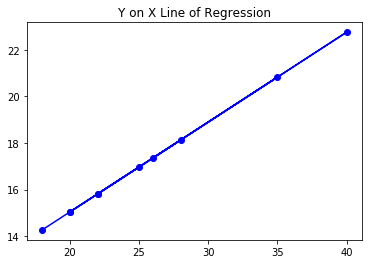

In [16]:
import matplotlib.pyplot as plt
plt.plot(X,y, 'o-', color='blue')
plt.title('Y on X Line of Regression')
plt.show()

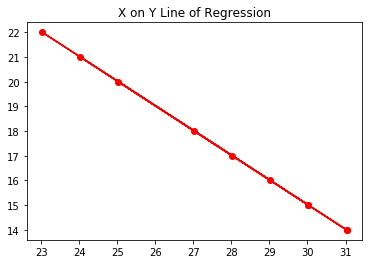

In [15]:
x = bxy - (Y - np.mean(Y)) + np.mean(X)
plt.plot(x,Y, 'o-', color='red')
plt.title('X on Y Line of Regression')
plt.show()

By calculation,  
$y = 0.385x + 7.34$  
$x = 2.226y - 12.7$ 

Hence, the age of wife when husband is 30 :    
$y = 0.385x + 7.34$  
$y = 0.385 \times 30 + 7.34$  
$y = 18.89$

and, the age of husband when wife is 19 :   
$x = 2.2268y + 12.7$  
$x = 2.2268 \times 19 + 12.7$  
$x = 29.6$ 

And, 
$\rho = \sqrt{byx.bxy}$  
$\rho = 0.92635$